
## Types de Données et Valeurs Manquantes ##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  30000 non-null  object
 1   step            30000 non-null  int64 
 2   type            30000 non-null  object
 3   amount          30000 non-null  int64 
 4   customer_id     30000 non-null  object
 5   age             30000 non-null  int64 
 6   is_fraud        30000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.6+ MB
None

## Nombre de vide dans le dataframe ##
transaction_id    0
step              0
type              0
amount            0
customer_id       0
age               0
is_fraud          0
dtype: int64

## Nombre de dupliqués dans le dataframe ##
0

## Statistiques Descriptives des Variables Numériques ##
               step        amount           age      is_fraud
count  30000.000000  3.000000e+04  

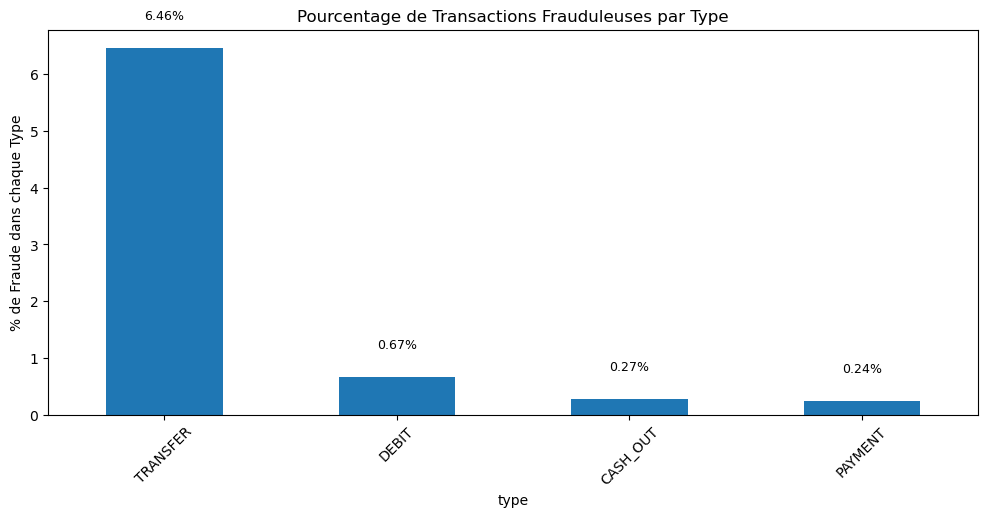


## 4. Feature Engineering Temporel ##


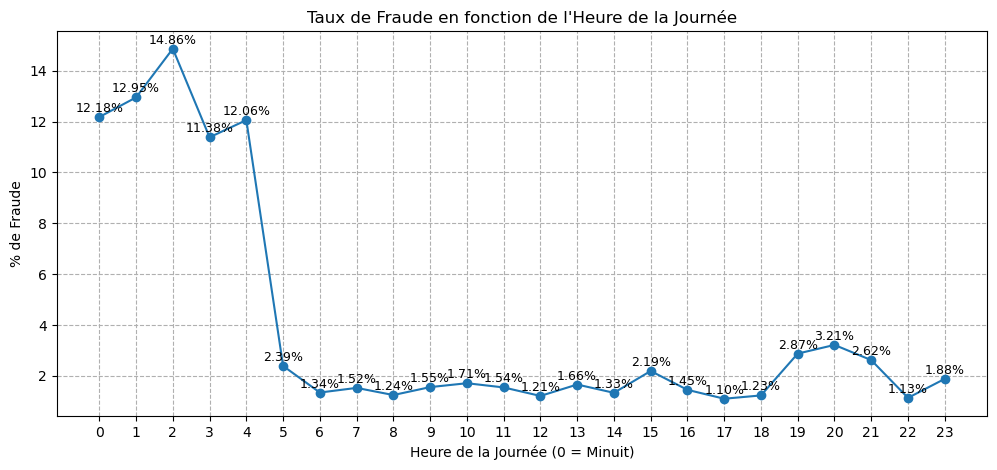

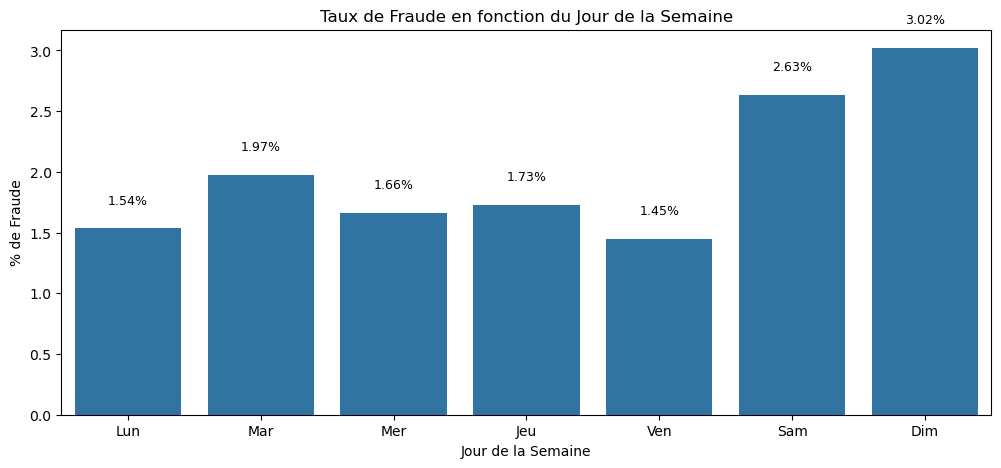

In [14]:
#EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de Pandas pour afficher plus de colonnes
pd.set_option('display.max_columns', 100)

# Chargement du dataset d'entraînement
df = pd.read_csv("train.csv")

print("\n## Types de Données et Valeurs Manquantes ##")
print(df.info())
print("\n## Nombre de vide dans le dataframe ##")
print(df.isna().sum())
print("\n## Nombre de dupliqués dans le dataframe ##")
print(df.duplicated().sum())

print("\n## Statistiques Descriptives des Variables Numériques ##")
print(df.describe())

print("\n## 3. Type de Transaction vs. Fraude ##")

# Nombre de transactions par type
print("Nombre de transactions par Type :")
print(df['type'].value_counts())

# Pourcentage de fraude par Type
type_fraud_pivot = pd.crosstab(df['type'], df['is_fraud'], normalize='index') * 100
print("\nPourcentage de Fraude (1) par Type de Transaction :")
print(type_fraud_pivot[1].sort_values(ascending=False))

# Visualisation (focus sur la colonne 1: is_fraud=1)
plt.figure(figsize=(12, 5))
ax = type_fraud_pivot[1].sort_values(ascending=False).plot(kind='bar')

plt.title('Pourcentage de Transactions Frauduleuses par Type')
plt.ylabel('% de Fraude dans chaque Type')
plt.xticks(rotation=45)

# --- Ajout des étiquettes ---
for i, value in enumerate(type_fraud_pivot[1].sort_values(ascending=False)):
    ax.text(i, value + 0.5, f"{value:.2f}%", ha='center', fontsize=9)

plt.show()



print("\n## 4. Feature Engineering Temporel ##")

# Création des nouvelles colonnes
df['hour'] = df['step'] % 24 # Heure de la journée (0 à 23)
df['day_of_week'] = (df['step'] // 24) % 7 # Jour de la semaine (0=Lun, 6=Dim)

# --- Analyse de la Fraude par Heure ---
hour_fraud_rate = df.groupby('hour')['is_fraud'].mean() * 100

plt.figure(figsize=(12, 5))
ax = hour_fraud_rate.plot(kind='line', marker='o')

plt.title('Taux de Fraude en fonction de l\'Heure de la Journée')
plt.ylabel('% de Fraude')
plt.xlabel('Heure de la Journée (0 = Minuit)')
plt.xticks(range(24))
plt.grid(True, linestyle='--')

# --- Ajout des étiquettes ---
for x, y in zip(hour_fraud_rate.index, hour_fraud_rate.values):
    ax.text(x, y + 0.2, f"{y:.2f}%", ha='center', fontsize=9)

plt.show()


# --- Analyse de la Fraude par Jour de la Semaine ---
day_labels = ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
day_fraud_rate = df.groupby('day_of_week')['is_fraud'].mean() * 100

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=day_fraud_rate.index, y=day_fraud_rate.values)

plt.title('Taux de Fraude en fonction du Jour de la Semaine')
plt.ylabel('% de Fraude')
plt.xlabel('Jour de la Semaine')

day_labels = ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
plt.xticks(range(7), day_labels, rotation=0)

# --- Ajout des étiquettes ---
for i, value in enumerate(day_fraud_rate.values):
    ax.text(i, value + 0.2, f"{value:.2f}%", ha='center', fontsize=9)

plt.show()



## 4. Feature Engineering Temporel ##


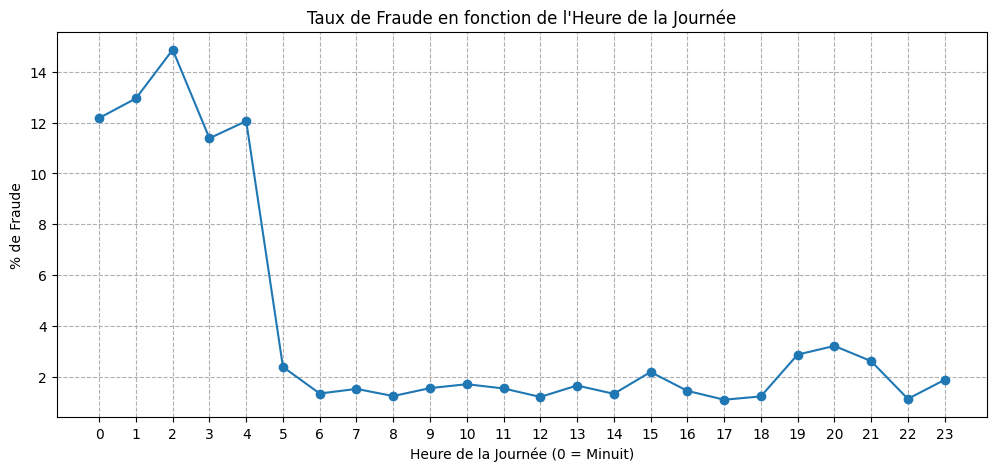

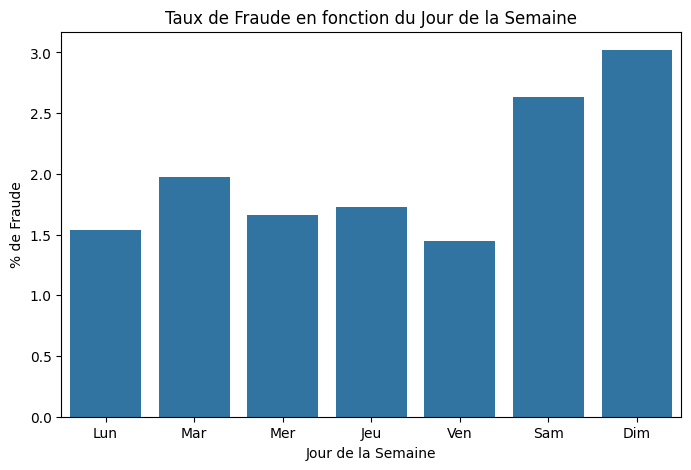


## ⚙️ 5. Préparation Finale du Dataset ##

Variables finales pour la modélisation:
['amount', 'age', 'is_fraud', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']

Dimensions finales : (30000, 37)
   amount  age  is_fraud  type_DEBIT  type_PAYMENT  type_TRANSFER  \
0  311000   24         0       False          True          False   
1  399600   25         0       False          True          False   
2    7500   38         0       False          True          False   
3   94000   26         0       False         False           True   
4   15000   26         0       False         False          False   

   day_of_week_0 